In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import yfinance as yf
import copy
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
def CAGR_weekly(DF):
    """Calculate CAGR based on weekly returns"""
    df = DF.copy()
    df["cum_return"] = (1 + df["week_ret"]).cumprod()
    n = len(df) / 52  
    cagr = (df["cum_return"].iloc[-1]) ** (1/n) - 1
    return cagr

def volatility_weekly(DF):
    """Annualized volatility for weekly returns"""
    df = DF.copy()
    vol = df["week_ret"].std() * np.sqrt(52)
    return vol

def sharpe_weekly(DF, rf):
    """Sharpe ratio using weekly returns"""
    df = DF.copy()
    sr = (CAGR_weekly(df) - rf) / volatility_weekly(df)
    return sr

def max_dd_weekly(DF):
    """Maximum drawdown for weekly returns"""
    df = DF.copy()
    df["cum_return"] = (1 + df["week_ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"] / df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd

In [3]:
df = pd.read_excel("bist100.xlsx")
df.head()

,Hisseler
0,BINHO.IS
1,AGHOL.IS
2,AKBNK.IS
3,AKSA.IS
4,AKSEN.IS


In [4]:
tickers = df["Hisseler"].tolist()

ohlc_mon = {}
#start = dt.datetime.today()-dt.timedelta(365*2)
#end = dt.datetime.today()
start="2024-10-01"
end=dt.datetime.today()

for ticker in tickers:
    ohlc_mon[ticker] = yf.download(ticker,start,end,interval='1wk', auto_adjust=True)
    ohlc_mon[ticker].dropna(inplace=True,how="all")
 
tickers = ohlc_mon.keys() # redefine tickers variable after removing any tickers with corrupted data
tickers

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

dict_keys(['BINHO.IS', 'AGHOL.IS', 'AKBNK.IS', 'AKSA.IS', 'AKSEN.IS', 'ALARK.IS', 'ALTNY.IS', 'ANSGR.IS', 'AEFES.IS', 'ARCLK.IS', 'ASELS.IS', 'ASTOR.IS', 'BALSU.IS', 'BTCIM.IS', 'BSOKE.IS', 'BIMAS.IS', 'BRSAN.IS', 'BRYAT.IS', 'CCOLA.IS', 'CWENE.IS', 'CANTE.IS', 'CLEBI.IS', 'CIMSA.IS', 'DAPGM.IS', 'DSTKF.IS', 'DOHOL.IS', 'DOAS.IS', 'EFORC.IS', 'EGEEN.IS', 'ECILC.IS', 'EKGYO.IS', 'ENJSA.IS', 'ENERY.IS', 'ENKAI.IS', 'EREGL.IS', 'EUPWR.IS', 'FENER.IS', 'FROTO.IS', 'GSRAY.IS', 'GENIL.IS', 'GESAN.IS', 'GRTHO.IS', 'GUBRF.IS', 'GLRMK.IS', 'GRSEL.IS', 'SAHOL.IS', 'HEKTS.IS', 'IEYHO.IS', 'TRENJ.IS', 'ISMEN.IS', 'KRDMD.IS', 'KTLEV.IS', 'KCAER.IS', 'KCHOL.IS', 'KONTR.IS', 'TRALT.IS', 'TRMET.IS', 'KUYAS.IS', 'MAGEN.IS', 'MAVI.IS', 'MIATK.IS', 'MGROS.IS', 'MPARK.IS', 'OBAMS.IS', 'ODAS.IS', 'OTKAR.IS', 'OYAKC.IS', 'PASEU.IS', 'PATEK.IS', 'PGSUS.IS', 'PETKM.IS', 'RALYH.IS', 'REEDR.IS', 'SASA.IS', 'SKBNK.IS', 'SOKM.IS', 'TABGD.IS', 'TAVHL.IS', 'TKFEN.IS', 'TOASO.IS', 'TSPOR.IS', 'TUKAS.IS', 'TUREX.IS',

In [5]:
xauusd = yf.download("GC=F", start,end,interval='1wk')["Close"]
usdtry = yf.download("USDTRY=X", start,end,interval='1wk')["Close"]

xautryg= (xauusd["GC=F"] * usdtry["USDTRY=X"]) / 31.1035
xautryg.name = "Close"
xautryg = pd.DataFrame(xautryg)
xautryg.head()

C:\Users\okand\AppData\Local\Temp\ipykernel_18260\2322723753.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  xauusd = yf.download("GC=F", start,end,interval='1wk')["Close"]
[*********************100%***********************]  1 of 1 completed
C:\Users\okand\AppData\Local\Temp\ipykernel_18260\2322723753.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usdtry = yf.download("USDTRY=X", start,end,interval='1wk')["Close"]
[*********************100%***********************]  1 of 1 completed


,Close
Date,
2024-09-30,2902.6946
2024-10-07,2926.4489
2024-10-14,2977.2132
2024-10-21,3021.3831
2024-10-28,3022.2027


In [6]:
ohlc_mon["XAUTRYG"]=xautryg

In [7]:
ohlc_dict = copy.deepcopy(ohlc_mon)
return_df = pd.DataFrame()

for ticker in tickers:
    print("calculating weekly return for ",ticker)
    ohlc_dict[ticker]["week_ret"]=ohlc_dict[ticker]["Close"].pct_change()
    return_df[ticker]=ohlc_dict[ticker]["week_ret"]

calculating weekly return for  BINHO.IS
calculating weekly return for  AGHOL.IS
calculating weekly return for  AKBNK.IS
calculating weekly return for  AKSA.IS
calculating weekly return for  AKSEN.IS
calculating weekly return for  ALARK.IS
calculating weekly return for  ALTNY.IS
calculating weekly return for  ANSGR.IS
calculating weekly return for  AEFES.IS
calculating weekly return for  ARCLK.IS
calculating weekly return for  ASELS.IS
calculating weekly return for  ASTOR.IS
calculating weekly return for  BALSU.IS
calculating weekly return for  BTCIM.IS
calculating weekly return for  BSOKE.IS
calculating weekly return for  BIMAS.IS
calculating weekly return for  BRSAN.IS
calculating weekly return for  BRYAT.IS
calculating weekly return for  CCOLA.IS
calculating weekly return for  CWENE.IS
calculating weekly return for  CANTE.IS
calculating weekly return for  CLEBI.IS
calculating weekly return for  CIMSA.IS
calculating weekly return for  DAPGM.IS
calculating weekly return for  DSTKF.IS
c

C:\Users\okand\AppData\Local\Temp\ipykernel_18260\440252374.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return_df[ticker]=ohlc_dict[ticker]["week_ret"]
C:\Users\okand\AppData\Local\Temp\ipykernel_18260\440252374.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return_df[ticker]=ohlc_dict[ticker]["week_ret"]
C:\Users\okand\AppData\Local\Temp\ipykernel_18260\440252374.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  C

In [10]:
def pflio(DF,m,x):
    """Returns cumulative portfolio return
    DF = dataframe with weekly return info for all stocks
    m = number of stock in the portfolio
    x = number of underporforming stocks to be removed from portfolio weekly"""
    df = DF.copy()
    portfolio = []
    weekly_ret = [0]
    dates=df.index
    pflio = []
    for i in range(1,len(df)):
        if len(portfolio) > 0:
            weekly_ret.append(df[portfolio].iloc[i,:].mean())
            bad_stocks = df[portfolio].iloc[i,:].sort_values(ascending=True)[:x].index.values.tolist()
            portfolio = [t for t in portfolio if t not in bad_stocks]
        fill = m - len(portfolio)
        new_picks = df[[t for t in tickers if t not in portfolio]].iloc[i,:].sort_values(ascending=False)[:fill].index.values.tolist() #[[t for t in tickers if t not in portfolio]]
        portfolio = portfolio + new_picks
        print(portfolio)
        pflio.append(portfolio)
    weekly_ret_df = pd.DataFrame(np.array(weekly_ret),columns=["week_ret"])
    return weekly_ret_df, pflio, dates

In [12]:
#calculating overall strategy's KPIs
print(CAGR_weekly(pflio(return_df,6,3)[0]))
print("-----------------------")
print(sharpe_weekly(pflio(return_df,6,3)[0],0.05))
print("-----------------------")
print(max_dd_weekly(pflio(return_df,6,3)[0]))
print("-----------------------")

['TKFEN.IS', 'TUREX.IS', 'EFORC.IS', 'PASEU.IS', 'OTKAR.IS', 'GENIL.IS']
['TKFEN.IS', 'EFORC.IS', 'OTKAR.IS', 'BRYAT.IS', 'BRSAN.IS', 'MPARK.IS']
['TKFEN.IS', 'EFORC.IS', 'BRSAN.IS', 'PATEK.IS', 'RALYH.IS', 'EUPWR.IS']
['PATEK.IS', 'RALYH.IS', 'EUPWR.IS', 'ALTNY.IS', 'REEDR.IS', 'KTLEV.IS']
['RALYH.IS', 'EUPWR.IS', 'KTLEV.IS', 'KONTR.IS', 'ASTOR.IS', 'CLEBI.IS']
['RALYH.IS', 'ASTOR.IS', 'CLEBI.IS', 'GESAN.IS', 'TKFEN.IS', 'EKGYO.IS']
['ASTOR.IS', 'CLEBI.IS', 'EKGYO.IS', 'IPEKE.IS', 'KOZAA.IS', 'IEYHO.IS']
['EKGYO.IS', 'IPEKE.IS', 'IEYHO.IS', 'GRTHO.IS', 'ANSGR.IS', 'BRYAT.IS']
['EKGYO.IS', 'ANSGR.IS', 'BRYAT.IS', 'CCOLA.IS', 'AEFES.IS', 'TUREX.IS']
['EKGYO.IS', 'ANSGR.IS', 'TUREX.IS', 'KUYAS.IS', 'ASTOR.IS', 'OYAKC.IS']
['TUREX.IS', 'ASTOR.IS', 'OYAKC.IS', 'DAPGM.IS', 'EFORC.IS', 'OBAMS.IS']
['TUREX.IS', 'ASTOR.IS', 'OYAKC.IS', 'FENER.IS', 'TURSG.IS', 'TOASO.IS']
['TUREX.IS', 'ASTOR.IS', 'FENER.IS', 'TSPOR.IS', 'EFORC.IS', 'MAGEN.IS']
['TUREX.IS', 'EFORC.IS', 'MAGEN.IS', 'SKBNK.IS', 'K

In [13]:
pf = pflio(return_df,6,3)[1]
pf_week_ret = pflio(return_df,6,3)[0]
dates = pflio(return_df,6,3)[2]

['TKFEN.IS', 'TUREX.IS', 'EFORC.IS', 'PASEU.IS', 'OTKAR.IS', 'GENIL.IS']
['TKFEN.IS', 'EFORC.IS', 'OTKAR.IS', 'BRYAT.IS', 'BRSAN.IS', 'MPARK.IS']
['TKFEN.IS', 'EFORC.IS', 'BRSAN.IS', 'PATEK.IS', 'RALYH.IS', 'EUPWR.IS']
['PATEK.IS', 'RALYH.IS', 'EUPWR.IS', 'ALTNY.IS', 'REEDR.IS', 'KTLEV.IS']
['RALYH.IS', 'EUPWR.IS', 'KTLEV.IS', 'KONTR.IS', 'ASTOR.IS', 'CLEBI.IS']
['RALYH.IS', 'ASTOR.IS', 'CLEBI.IS', 'GESAN.IS', 'TKFEN.IS', 'EKGYO.IS']
['ASTOR.IS', 'CLEBI.IS', 'EKGYO.IS', 'IPEKE.IS', 'KOZAA.IS', 'IEYHO.IS']
['EKGYO.IS', 'IPEKE.IS', 'IEYHO.IS', 'GRTHO.IS', 'ANSGR.IS', 'BRYAT.IS']
['EKGYO.IS', 'ANSGR.IS', 'BRYAT.IS', 'CCOLA.IS', 'AEFES.IS', 'TUREX.IS']
['EKGYO.IS', 'ANSGR.IS', 'TUREX.IS', 'KUYAS.IS', 'ASTOR.IS', 'OYAKC.IS']
['TUREX.IS', 'ASTOR.IS', 'OYAKC.IS', 'DAPGM.IS', 'EFORC.IS', 'OBAMS.IS']
['TUREX.IS', 'ASTOR.IS', 'OYAKC.IS', 'FENER.IS', 'TURSG.IS', 'TOASO.IS']
['TUREX.IS', 'ASTOR.IS', 'FENER.IS', 'TSPOR.IS', 'EFORC.IS', 'MAGEN.IS']
['TUREX.IS', 'EFORC.IS', 'MAGEN.IS', 'SKBNK.IS', 'K

In [14]:
bist100 = yf.download("XU100.IS",start,end,interval='1wk', auto_adjust=True)
bist100["week_ret"] = bist100["Close"].pct_change().fillna(0)
print(CAGR_weekly(bist100))
print(sharpe_weekly(bist100,0.05))
print(max_dd_weekly(bist100))

[*********************100%***********************]  1 of 1 completed

0.16519800016853803
0.40682715262716335
0.1679796301409411


['TKFEN.IS', 'TUREX.IS', 'EFORC.IS', 'PASEU.IS', 'OTKAR.IS', 'GENIL.IS']
['TKFEN.IS', 'EFORC.IS', 'OTKAR.IS', 'BRYAT.IS', 'BRSAN.IS', 'MPARK.IS']
['TKFEN.IS', 'EFORC.IS', 'BRSAN.IS', 'PATEK.IS', 'RALYH.IS', 'EUPWR.IS']
['PATEK.IS', 'RALYH.IS', 'EUPWR.IS', 'ALTNY.IS', 'REEDR.IS', 'KTLEV.IS']
['RALYH.IS', 'EUPWR.IS', 'KTLEV.IS', 'KONTR.IS', 'ASTOR.IS', 'CLEBI.IS']
['RALYH.IS', 'ASTOR.IS', 'CLEBI.IS', 'GESAN.IS', 'TKFEN.IS', 'EKGYO.IS']
['ASTOR.IS', 'CLEBI.IS', 'EKGYO.IS', 'IPEKE.IS', 'KOZAA.IS', 'IEYHO.IS']
['EKGYO.IS', 'IPEKE.IS', 'IEYHO.IS', 'GRTHO.IS', 'ANSGR.IS', 'BRYAT.IS']
['EKGYO.IS', 'ANSGR.IS', 'BRYAT.IS', 'CCOLA.IS', 'AEFES.IS', 'TUREX.IS']
['EKGYO.IS', 'ANSGR.IS', 'TUREX.IS', 'KUYAS.IS', 'ASTOR.IS', 'OYAKC.IS']
['TUREX.IS', 'ASTOR.IS', 'OYAKC.IS', 'DAPGM.IS', 'EFORC.IS', 'OBAMS.IS']
['TUREX.IS', 'ASTOR.IS', 'OYAKC.IS', 'FENER.IS', 'TURSG.IS', 'TOASO.IS']
['TUREX.IS', 'ASTOR.IS', 'FENER.IS', 'TSPOR.IS', 'EFORC.IS', 'MAGEN.IS']
['TUREX.IS', 'EFORC.IS', 'MAGEN.IS', 'SKBNK.IS', 'K

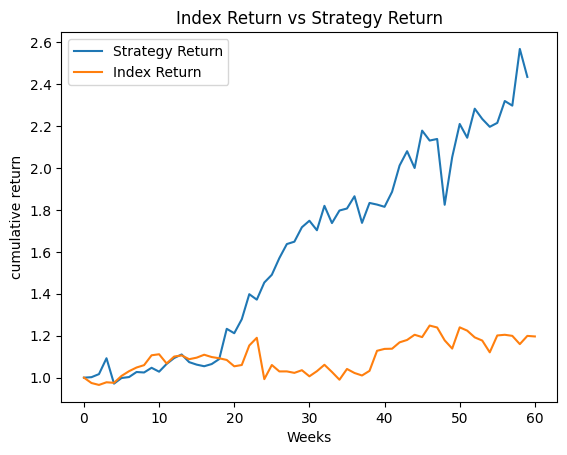

In [15]:
fig, ax = plt.subplots()
plt.plot((1+pflio(return_df,6,3)[0]).cumprod())
plt.plot((1+bist100["week_ret"].reset_index(drop=True)).cumprod())
plt.title("Index Return vs Strategy Return")
plt.ylabel("cumulative return")
plt.xlabel("Weeks")
ax.legend(["Strategy Return","Index Return"])

In [16]:
def create_strategy_table(df, pf, dates, bist100_df):
    cols = []

    for i in range(len(pf[0])):
        cols.append(f"stock_{i+1}")

    data = pd.DataFrame(pf, columns=cols)
    data.loc[data.shape[0]] = np.nan
    data = data.shift(1)
    data["week_ret"] = df.shift(1)
    data.loc[data.index[-1],"week_ret"] = df["week_ret"][df.shape[0]-1]
    data["cumulative return"] = (1+data["week_ret"]).cumprod()
    data.set_index(dates, inplace=True)
    data["bist100 cumulative return"] = (1+bist100_df["week_ret"][1:]).cumprod()
    return data

strategy_table = create_strategy_table(pf_week_ret, pf, dates, bist100)
strategy_table.head()

,stock_1,stock_2,stock_3,stock_4,stock_5,stock_6,week_ret,cumulative return,bist100 cumulative return
Date,,,,,,,,,
2024-09-30,None,None,None,None,None,None,NaN,NaN,NaN
2024-10-07,TKFEN.IS,TUREX.IS,EFORC.IS,PASEU.IS,OTKAR.IS,GENIL.IS,0.0000,1.0000,0.9744
2024-10-14,TKFEN.IS,EFORC.IS,OTKAR.IS,BRYAT.IS,BRSAN.IS,MPARK.IS,0.0022,1.0022,0.9653
2024-10-21,TKFEN.IS,EFORC.IS,BRSAN.IS,PATEK.IS,RALYH.IS,EUPWR.IS,0.0146,1.0169,0.9780
2024-10-28,PATEK.IS,RALYH.IS,EUPWR.IS,ALTNY.IS,REEDR.IS,KTLEV.IS,0.0744,1.0925,0.9754


In [17]:
strategy_table.to_excel("Strateji 1.xlsx")

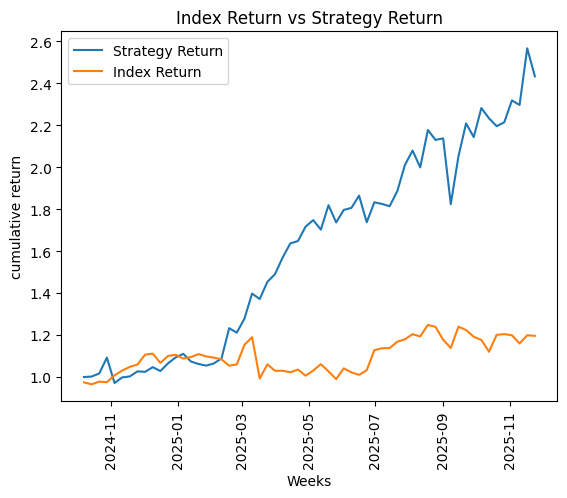

In [18]:
fig, ax = plt.subplots()
plt.plot(strategy_table["cumulative return"])
plt.plot(strategy_table["bist100 cumulative return"])
plt.title("Index Return vs Strategy Return")
plt.ylabel("cumulative return")
plt.xlabel("Weeks")
plt.xticks(rotation=90)
ax.legend(["Strategy Return","Index Return"])

In [19]:
strategy_table.tail()

,stock_1,stock_2,stock_3,stock_4,stock_5,stock_6,week_ret,cumulative return,bist100 cumulative return
Date,,,,,,,,,
2025-10-27,RALYH.IS,DSTKF.IS,TURSG.IS,MAGEN.IS,BRSAN.IS,BINHO.IS,0.0085,2.2148,1.2044
2025-11-03,DSTKF.IS,TURSG.IS,MAGEN.IS,IEYHO.IS,CANTE.IS,MGROS.IS,0.0471,2.3191,1.1993
2025-11-10,DSTKF.IS,IEYHO.IS,MGROS.IS,KOZAL.IS,ECILC.IS,FENER.IS,-0.0095,2.2971,1.1599
2025-11-17,DSTKF.IS,KOZAL.IS,ECILC.IS,KUYAS.IS,ENERY.IS,KONTR.IS,0.1177,2.5675,1.1991
2025-11-24,DSTKF.IS,ENERY.IS,KONTR.IS,OBAMS.IS,HALKB.IS,KTLEV.IS,-0.0520,2.4339,1.1964


In [33]:
def markowitz_opt(log_retunrs, risk_free_rate=0.0067):
    num_assets = len(log_retunrs.columns)
    num_portfolios = 10000

    pfolio_returns = []
    pfolio_volatilities = []
    pfolio_sharpes = []
    pfolio_weights = []
    
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights/=np.sum(weights)
    
        p_return = np.sum(weights * log_returns.mean()) * 5
        p_vol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 5, weights)))
    
        sharpe = (p_return - risk_free_rate) / p_vol
        
        pfolio_returns.append(p_return)
        pfolio_volatilities.append(p_vol)
        pfolio_sharpes.append(sharpe)
        pfolio_weights.append(weights)
    
    portfolios = pd.DataFrame({
        'Return': pfolio_returns,
        'Volatility': pfolio_volatilities,
        'Sharpe': pfolio_sharpes
    })
    
    for i, col in enumerate(log_returns.columns):
        portfolios[col] = [w[i] for w in pfolio_weights]
    
    max_sharpe_port = portfolios.loc[portfolios['Sharpe'].idxmax()]
    max_sharpe_port = pd.DataFrame(max_sharpe_port).T
    max_sharpe_port = max_sharpe_port.reset_index(drop=True)
    return max_sharpe_port

In [35]:
include_stocks = strategy_table.columns[strategy_table.columns.str.contains("stock")].tolist()

for i in range(1, strategy_table.shape[0]):
    start = strategy_table.index[i] - dt.timedelta(252)
    end = strategy_table.index[i]
    tickers = strategy_table.loc[strategy_table.index[i], include_stocks].dropna().tolist()

    use_gold = "XAUTRYG" in tickers
    if use_gold:
        # Altın dönüşümü için gerekli enstrümanları ekle
        for j in ["GC=F", "USDTRY=X"]:
            if j not in tickers:
                tickers.append(j)
        tickers = [t for t in tickers if t != "XAUTRYG"]
        data = yf.download(tickers, start=start, end=end, interval='1d', auto_adjust=True)['Close']
        data["XAUTRYG"] = (data["GC=F"] * data["USDTRY=X"]) / 31.1035
        data.drop(["GC=F", "USDTRY=X"], axis=1, inplace=True)
    else:
        try:
            data = yf.download(tickers, start=start, end=end, interval='1d', auto_adjust=True)['Close']
        except KeyError:
            continue

    log_returns = np.log(data / data.shift(1)).dropna()

    # Portföy optimizasyonu
    try:
        max_sharpe_port = markowitz_opt(log_returns, risk_free_rate=0.0067)
    except KeyError:
        continue
    weights_dict = max_sharpe_port.loc[0, max_sharpe_port.columns[3:]].to_dict()


    # Ağırlıkları ekle
    for j in range(1, len(include_stocks) + 1):
        col_name = f"stock_{j}"
        weight_col = f"{col_name}_weight"

        if weight_col not in strategy_table.columns:
            strategy_table[weight_col] = np.nan

        stock_name = strategy_table.loc[strategy_table.index[i], col_name]
        if pd.notna(stock_name):
            # Eğer hücre zaten doluysa üzerine yazma
            if pd.isna(strategy_table.loc[strategy_table.index[i], weight_col]):
                # Sadece tüm hisseler weights_dict içinde varsa ata
                if all(
                    str(strategy_table.loc[strategy_table.index[i], f"stock_{k}"]) in weights_dict
                    for k in range(1, len(include_stocks) + 1)
                ):
                    strategy_table.loc[strategy_table.index[i], weight_col] = weights_dict.get(stock_name, np.nan)


[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%********

In [36]:
strategy_table.tail()

,stock_1,stock_2,stock_3,stock_4,stock_5,stock_6,week_ret,cumulative return,bist100 cumulative return,stock_1_weight,stock_2_weight,stock_3_weight,stock_4_weight,stock_5_weight,stock_6_weight
Date,,,,,,,,,,,,,,,
2025-09-22,IEYHO.IS,KONTR.IS,DSTKF.IS,ECILC.IS,RALYH.IS,IPEKE.IS,0.0771,2.2096,1.2242,0.2820,0.0414,0.5730,0.0259,0.0687,0.0090
2025-09-29,IEYHO.IS,ECILC.IS,RALYH.IS,GENIL.IS,CWENE.IS,HALKB.IS,-0.0297,2.1440,1.1920,0.3476,0.1288,0.3905,0.0520,0.0017,0.0794
2025-10-06,IEYHO.IS,RALYH.IS,GENIL.IS,GRTHO.IS,AKSEN.IS,ENERY.IS,0.0646,2.2825,1.1769,0.1962,0.2808,0.0141,0.1504,0.0037,0.3548
2025-10-13,RALYH.IS,GRTHO.IS,AKSEN.IS,MAGEN.IS,DSTKF.IS,PASEU.IS,-0.0214,2.2336,1.1207,0.0815,0.1557,0.0327,0.1703,0.1723,0.3875
2025-10-20,RALYH.IS,DSTKF.IS,PASEU.IS,TURSG.IS,TSPOR.IS,ISCTR.IS,-0.0168,2.1961,1.2012,0.2622,0.2632,0.3797,0.0611,0.0155,0.0183


In [37]:
strategy_table.head()

,stock_1,stock_2,stock_3,stock_4,stock_5,stock_6,week_ret,cumulative return,bist100 cumulative return,stock_1_weight,stock_2_weight,stock_3_weight,stock_4_weight,stock_5_weight,stock_6_weight
Date,,,,,,,,,,,,,,,
2024-09-30,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-07,TKFEN.IS,TUREX.IS,EFORC.IS,PASEU.IS,OTKAR.IS,GENIL.IS,0.0000,1.0000,0.9744,0.0104,0.2002,0.5310,0.0695,0.0191,0.1698
2024-10-14,TKFEN.IS,EFORC.IS,OTKAR.IS,BRYAT.IS,BRSAN.IS,MPARK.IS,0.0022,1.0022,0.9653,0.0151,0.6799,0.1711,0.0287,0.0888,0.0164
2024-10-21,TKFEN.IS,EFORC.IS,BRSAN.IS,PATEK.IS,RALYH.IS,EUPWR.IS,0.0146,1.0169,0.9780,0.1514,0.7023,0.0959,0.0120,0.0035,0.0348
2024-10-28,PATEK.IS,RALYH.IS,EUPWR.IS,ALTNY.IS,REEDR.IS,KTLEV.IS,0.0744,1.0925,0.9754,0.1846,0.3020,0.0178,0.4676,0.0160,0.0120


In [38]:
idx = strategy_table[1:][strategy_table["stock_1_weight"][1:].isna()].index.tolist()
strategy_table.loc[idx,:] = strategy_table.loc[idx,:].fillna(1/6)
strategy_table.isnull().sum()

stock_1                      1
stock_2                      1
stock_3                      1
stock_4                      1
stock_5                      1
stock_6                      1
week_ret                     1
cumulative return            1
bist100 cumulative return    1
stock_1_weight               1
stock_2_weight               1
stock_3_weight               1
stock_4_weight               1
stock_5_weight               1
stock_6_weight               1
dtype: int64

In [39]:
cols = [t for t in strategy_table.columns if "stock" in t and "weight" not in t]
weight_cols = [t for t in strategy_table.columns if "stock" in t and "weight" in t]

for i in range(1, len(strategy_table)-1):
    tickers = strategy_table.loc[strategy_table.index[i], cols].dropna().tolist()
    weights = strategy_table.loc[strategy_table.index[i], weight_cols].dropna().tolist()
    
    if len(tickers) != len(weights) or len(tickers) == 0:
        continue

    start_date = strategy_table.index[i]
    end_date = strategy_table.index[i+1]

    week_df = pd.DataFrame(return_df.loc[end_date, tickers]).T
    
    if week_df.empty:
        continue
    valid_tickers = [t for t in tickers if t in week_df.columns]
    if not valid_tickers:
        continue

    weight_dict = dict(zip(tickers, weights))
    valid_weights = np.array([weight_dict[t] for t in valid_tickers])
    valid_weights = valid_weights / valid_weights.sum()

    portfolio_returns = np.dot(week_df[valid_tickers].values, valid_weights)
    pf_ret = np.mean(portfolio_returns)

    strategy_table.loc[strategy_table.index[i+1], "optimum_ret"] = pf_ret

strategy_table.loc[strategy_table.index[1],"optimum_ret"] = 0
strategy_table["cumulative optimum return"] = (1+strategy_table["optimum_ret"]).cumprod()

In [40]:
strategy_table.tail()

,stock_1,stock_2,stock_3,stock_4,stock_5,stock_6,week_ret,cumulative return,bist100 cumulative return,stock_1_weight,stock_2_weight,stock_3_weight,stock_4_weight,stock_5_weight,stock_6_weight,optimum_ret,cumulative optimum return
Date,,,,,,,,,,,,,,,,,
2025-09-22,IEYHO.IS,KONTR.IS,DSTKF.IS,ECILC.IS,RALYH.IS,IPEKE.IS,0.0771,2.2096,1.2242,0.2820,0.0414,0.5730,0.0259,0.0687,0.0090,0.1574,2.8857
2025-09-29,IEYHO.IS,ECILC.IS,RALYH.IS,GENIL.IS,CWENE.IS,HALKB.IS,-0.0297,2.1440,1.1920,0.3476,0.1288,0.3905,0.0520,0.0017,0.0794,-0.1580,2.4297
2025-10-06,IEYHO.IS,RALYH.IS,GENIL.IS,GRTHO.IS,AKSEN.IS,ENERY.IS,0.0646,2.2825,1.1769,0.1962,0.2808,0.0141,0.1504,0.0037,0.3548,0.1072,2.6902
2025-10-13,RALYH.IS,GRTHO.IS,AKSEN.IS,MAGEN.IS,DSTKF.IS,PASEU.IS,-0.0214,2.2336,1.1207,0.0815,0.1557,0.0327,0.1703,0.1723,0.3875,-0.0516,2.5514
2025-10-20,RALYH.IS,DSTKF.IS,PASEU.IS,TURSG.IS,TSPOR.IS,ISCTR.IS,-0.0168,2.1961,1.2012,0.2622,0.2632,0.3797,0.0611,0.0155,0.0183,-0.0192,2.5025


In [41]:
strategy_table.head()

,stock_1,stock_2,stock_3,stock_4,stock_5,stock_6,week_ret,cumulative return,bist100 cumulative return,stock_1_weight,stock_2_weight,stock_3_weight,stock_4_weight,stock_5_weight,stock_6_weight,optimum_ret,cumulative optimum return
Date,,,,,,,,,,,,,,,,,
2024-09-30,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-07,TKFEN.IS,TUREX.IS,EFORC.IS,PASEU.IS,OTKAR.IS,GENIL.IS,0.0000,1.0000,0.9744,0.0104,0.2002,0.5310,0.0695,0.0191,0.1698,0.0000,1.0000
2024-10-14,TKFEN.IS,EFORC.IS,OTKAR.IS,BRYAT.IS,BRSAN.IS,MPARK.IS,0.0022,1.0022,0.9653,0.0151,0.6799,0.1711,0.0287,0.0888,0.0164,-0.0010,0.9990
2024-10-21,TKFEN.IS,EFORC.IS,BRSAN.IS,PATEK.IS,RALYH.IS,EUPWR.IS,0.0146,1.0169,0.9780,0.1514,0.7023,0.0959,0.0120,0.0035,0.0348,0.0387,1.0376
2024-10-28,PATEK.IS,RALYH.IS,EUPWR.IS,ALTNY.IS,REEDR.IS,KTLEV.IS,0.0744,1.0925,0.9754,0.1846,0.3020,0.0178,0.4676,0.0160,0.0120,0.0476,1.0870


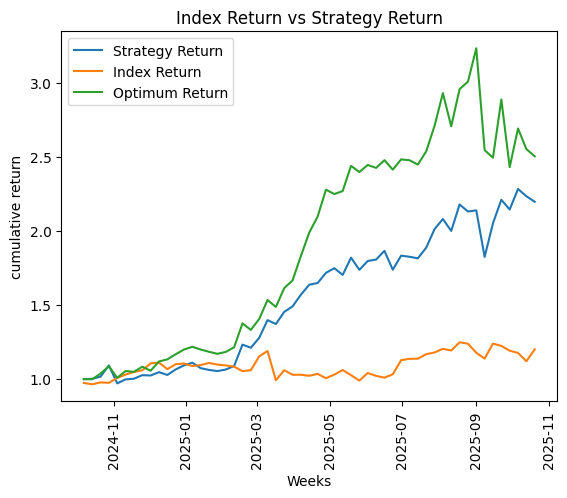

In [42]:
fig, ax = plt.subplots()
plt.plot(strategy_table["cumulative return"])
plt.plot(strategy_table["bist100 cumulative return"])
plt.plot(strategy_table["cumulative optimum return"])
plt.title("Index Return vs Strategy Return")
plt.ylabel("cumulative return")
plt.xlabel("Weeks")
plt.xticks(rotation=90)
ax.legend(["Strategy Return","Index Return", "Optimum Return"])

In [113]:
strategy_table.to_excel("Strateji 2.xlsx")